<a href="https://colab.research.google.com/github/Nikhil-Patil-Web/MachineLearningTutorials/blob/main/DatasetsForUsage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
filepath1="/content/drive/My Drive/BTPDatasets/DepressionState/data"
filepath2="/content/drive/My Drive/BTPDatasets/HealthySubjectsBiosignalDataSet/data"
filepath3="/content/drive/My Drive/BTPDatasets/DepressionState/data"
filepath4="/content/drive/My Drive/BTPDatasets/DepressionState/data"

# Importing the Depression Dataset

In [26]:
import os
import pandas as pd
from google.colab import drive
import numpy as np

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Read files that have data of people who are depressed and have a specific condition

In [36]:
csv_files = [file for file in os.listdir(filepath1+"/condition") if file.endswith('.csv')]
print(csv_files)


['condition_1.csv', 'condition_12.csv', 'condition_10.csv', 'condition_11.csv', 'condition_22.csv', 'condition_19.csv', 'condition_2.csv', 'condition_20.csv', 'condition_23.csv', 'condition_17.csv', 'condition_15.csv', 'condition_3.csv', 'condition_16.csv', 'condition_18.csv', 'condition_21.csv', 'condition_13.csv', 'condition_6.csv', 'condition_7.csv', 'condition_14.csv', 'condition_4.csv', 'condition_5.csv', 'condition_8.csv', 'condition_9.csv']


Add all these dataframes to a single array and to each of these dataframes add a Label column

In [37]:
dfs_condition =[]

for i in csv_files:
  df = pd.read_csv(filepath1+"/condition/"+i)
  df["Label"]=np.ones(len(df))
  dfs_condition.append(df)


In [38]:
dfs_condition[0].head()

,timestamp,date,activity,Label
0,2003-05-07 12:00:00,2003-05-07,0,1.0
1,2003-05-07 12:01:00,2003-05-07,143,1.0
2,2003-05-07 12:02:00,2003-05-07,0,1.0
3,2003-05-07 12:03:00,2003-05-07,20,1.0
4,2003-05-07 12:04:00,2003-05-07,166,1.0


Read files that have data of people who are not depressed and do not have a condition

In [39]:
csv_files2 = [file for file in os.listdir(filepath1+"/control") if file.endswith('.csv')]
print(csv_files2)

['control_19.csv', 'control_18.csv', 'control_13.csv', 'control_12.csv', 'control_14.csv', 'control_1.csv', 'control_17.csv', 'control_16.csv', 'control_2.csv', 'control_20.csv', 'control_21.csv', 'control_10.csv', 'control_11.csv', 'control_15.csv', 'control_22.csv', 'control_3.csv', 'control_28.csv', 'control_27.csv', 'control_30.csv', 'control_4.csv', 'control_7.csv', 'control_6.csv', 'control_23.csv', 'control_31.csv', 'control_24.csv', 'control_29.csv', 'control_25.csv', 'control_9.csv', 'control_5.csv', 'control_8.csv', 'control_32.csv', 'control_26.csv']


Store all these control files in an array and while looping add the class label to it.

In [40]:
dfs_control=[]
for i in csv_files2:
  df = pd.read_csv(filepath1+"/control/"+i)
  df["Label"]=np.zeros(len(df))
  dfs_control.append(df)


In [41]:
dfs_control[0].head()

,timestamp,date,activity,Label
0,2004-01-09 09:00:00,2004-01-09,4,0.0
1,2004-01-09 09:01:00,2004-01-09,3,0.0
2,2004-01-09 09:02:00,2004-01-09,3,0.0
3,2004-01-09 09:03:00,2004-01-09,3,0.0
4,2004-01-09 09:04:00,2004-01-09,3,0.0


### Exploratory Data Analysis on the Depression Dataset

A look at the condition having datasets

In [46]:
#Print the maximum value of activity in the depression having datasets

maximums_condition =[]

for df in dfs_condition:
  maximum =df["activity"].max()
  maximums_condition.append(maximum)

maximum_condition = np.max(maximums_condition)
maximum_condition

8000

A look at the controlled datasets

In [47]:
maximums_control =[]

for df in dfs_control:
  maximum =df["activity"].max()
  maximums_control.append(maximum)

maximum_control = np.max(maximums_control)
maximum_control

8000

In [48]:
import matplotlib.pyplot as plt


Make a plot that shows the trend with time for any one of the datasets

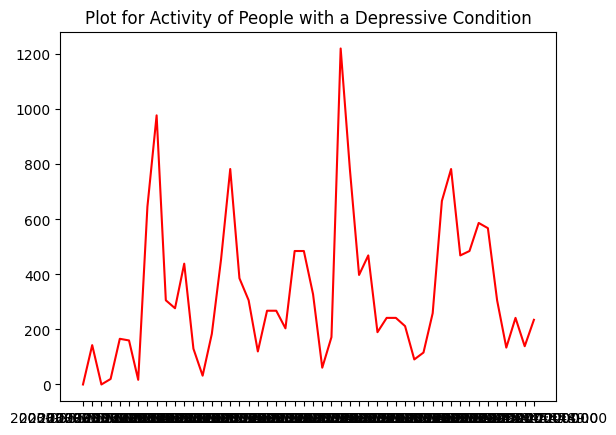

In [54]:
dfs_condition_temp = dfs_condition[0].head(50);

dfs_condition_temp

plt.plot(dfs_condition_temp["timestamp"], dfs_condition_temp["activity"], color="red")
plt.title("Plot for Activity of People with a Depressive Condition")
plt.xlabel="Time Stamps"
plt.ylabel="Activity Level"
plt.show()


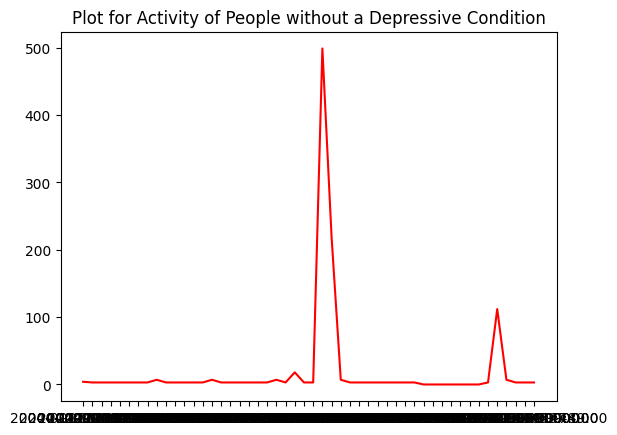

In [55]:
dfs_control_temp = dfs_control[0].head(50);

dfs_control_temp

plt.plot(dfs_control_temp["timestamp"], dfs_control_temp["activity"], color="red")
plt.title("Plot for Activity of People without a Depressive Condition")
plt.xlabel="Time Stamps"
plt.ylabel="Activity Level"
plt.show()

We will now check the number of times a value 0 has been reported in the activity column as that can be a major differentiator in terms of determining